# Algumas propriedades da Transformada de Fourier

Este notebook trará algumas aplicações das propriedades da Transformada de Fourier, principalmente, as de derivadas e atraso. Estas propriedades servirão para introduzir desde já o conceito da *wavelet* de Ricker, muito utilizada na sísmica, além de demonstrar que esta função é a derivada segunda de uma função gaussiana. Por fim, introduziremos o conceito de atraso, que terá aplicações no estudo da convolução. Este notebook é fornecido como material didático no curso de Introdução ao Processamento de Dados Sísmicos.   

## O que é uma Transformada de Fourier?

**Definição 1**: Uma função $f: \mathbb{R} \rightarrow \mathbb{R}$ terá como sua transformada uma função $F: \mathbb{R} \rightarrow \mathbb{C}$ definida pela expressão 

$$ F(\omega) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{+\infty} f(x) e^{i\omega x} d\omega.$$

O resultado da transformada de Fourier é uma função complexa, que indica a intensidade de cada uma das frequências em um intervalo infinitesimal. Portanto, é a combinação linear das frequências.

**Obs¹.:** Denota-se por transformada de Fourier da função $f(x)$ por $\mathcal{F}[f(x)]$.


**Definição 2**: Se uma função $F: \mathbb{R} \rightarrow \mathbb{C}$ terá como transformada de Fourier inversa $f: \mathbb{R} \rightarrow \mathbb{R}$ é definida pela expressão

$$ f(x) = \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{+\infty} F(\omega) e^{-i\omega x} dx. $$

**Obs².:** Denota-se por transforma de Fourier inversa da função $F(\omega)$ por $\mathcal{F}^{-1}[F(\omega)]$.


**Propriedades**:

[Linearidade] $\mathcal{F}[a \, f(x) + b \, g(x)] = a \, \mathcal{F}[f(x)] + b \, \mathcal{F}[g(x)]$

[Diferenciação] $\mathcal{F}[f^{(n)}(x)] = (-i\omega)^n \mathcal{F}[f(x)]$

[Atraso] $\mathcal{F}[f(x + \Delta x)] = \mathcal{F}[f(x)] e^{-i\omega \Delta x}$

### A função Gaussiana

Uma [função Gaussiana](https://en.wikipedia.org/wiki/Gaussian_function), muito utilizada na matemática e na estatística, pode ser definida como

$$ f(x) = a \, e^{-(x-b)^2/2c^2},$$
em que $a$ é a altura do pico da curva, $b$ fornece o valor onde a curva será centrada e $c$ é a largura da curva. 

A função Gaussiana, comumente referida somente por Gaussiana, é utilizada também para representar uma função densidade de probabilidade de uma variável aleatória, e pode ser definida como

$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-0.5(x - \mu)^2/\sigma^2},$$
em que $\sigma$ é a variância dos dados e $\mu$ é o valor esperado para uma dada variável. 

Além disso, podemos definir a [wavelet de Ricker](https://wiki.seg.org/wiki/Dictionary:Ricker_wavelet) como sendo a segunda derivada da função Gaussiana. Esta wavelet, conhecida também como *Mexican hat wavelet* devido a semelhança com o formato do sombreiro mexicano, é utilizada em diversas aplicações na sísmica, tais como a modelagem e a geração de traços sísmicos sintéticos. 





## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Gerando a função Gaussiana

a = 1.
b = 0.
c = 8.

n = 1000
x = np.linspace(-50., 50., n)

In [3]:
f = a*np.exp(-((x-a)*(x-a))/(2*(c*c)))

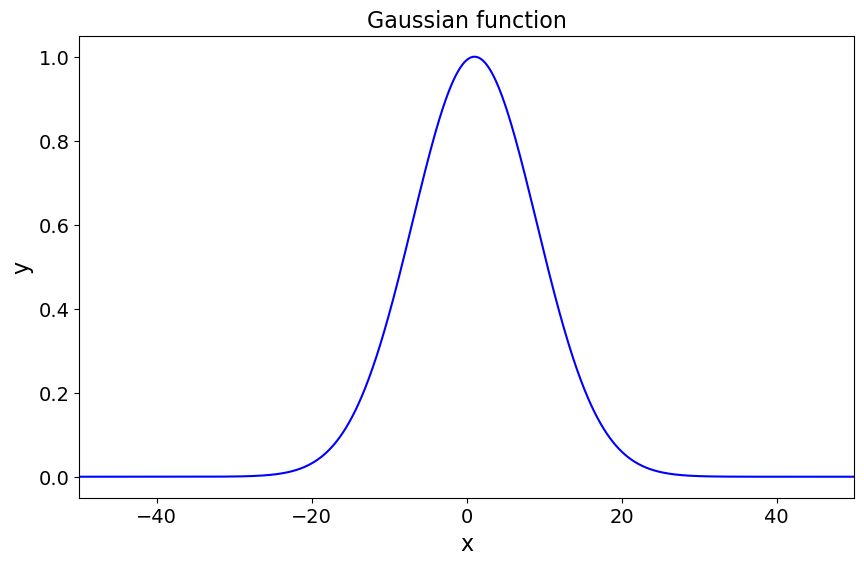

In [4]:
plt.figure(figsize=(10,6))
plt.title('Gaussian function',fontsize=16)
plt.plot(x,f,'b-')
plt.xlim(np.min(x),np.max(x))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

## Implementando uma transformada de Fourier

In [5]:
def ft(x,f,w,dx,n):
    """
    Implementing a dummy fourier transform
    """
    
    F = np.empty(n) + 0j
    for i in range(n):
        F[i] = np.sum(f*np.exp(-1j*w[i]*x))*dx
        F[i] /= np.sqrt(2.*np.pi) 
    
    return (F)

def ift(x,F,w,dw,n):
    """
    Implementing an inverse dummy fourier transform
    """
    
    f = np.empty(n) 
    for i in range(n):
        f[i] = np.real(np.sum(F*np.exp(1j*w*x[i]))*dw)
        f[i] /= np.sqrt(2.*np.pi) 
    
    return f

### Testando as propriedades

In [6]:
## Alguns parâmetros necessário para o cálculo da transformada de Fourier
dx = 100./(n-1)
dw = 2.*np.pi/n/dx
w = np.arange(n)*dw - n*dw/2

In [7]:
F = ft(x,f,w,dx,n)

#### Primeira propriedade

$$\mathcal{F}[f(x + \Delta x)] = \mathcal{F}[f(x)] e^{-i\omega \Delta x}$$


In [8]:
delta_x = 20.
kernel = np.exp(-1j*w*delta_x)

In [9]:
F_shift = F*kernel

In [10]:
f_shift = ift(x,F_shift,w,dw,n)

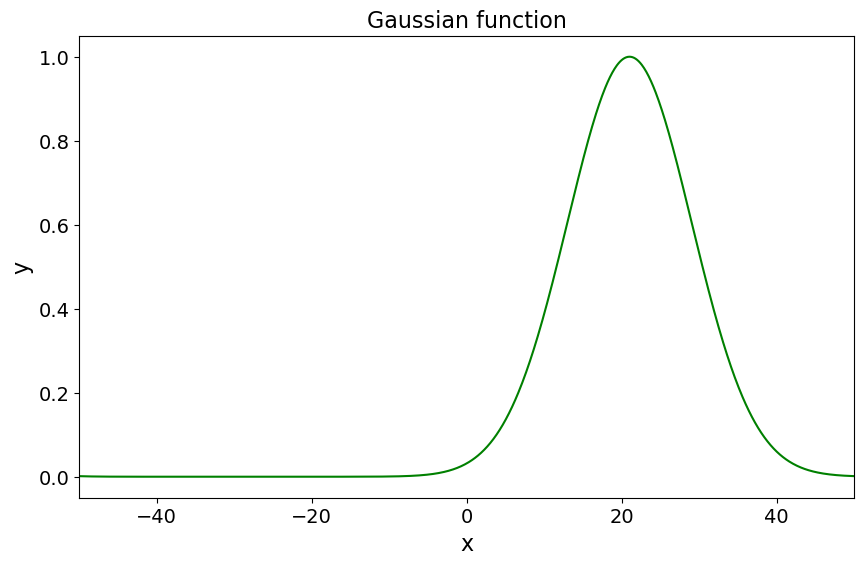

In [11]:
plt.figure(figsize=(10,6))
plt.title('Gaussian function',fontsize=16)
plt.plot(x,f_shift,'g-')
plt.xlim(np.min(x),np.max(x))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

#### Segunda propriedade

$$\mathcal{F}[f^{(n)}(x)] = (-i\omega)^n \mathcal{F}[f(x)]$$

In [12]:
F_ricker = ((-1j*w)**2)*F 

In [15]:
f_ricker = -ift(x,F_ricker,w,dw,n)

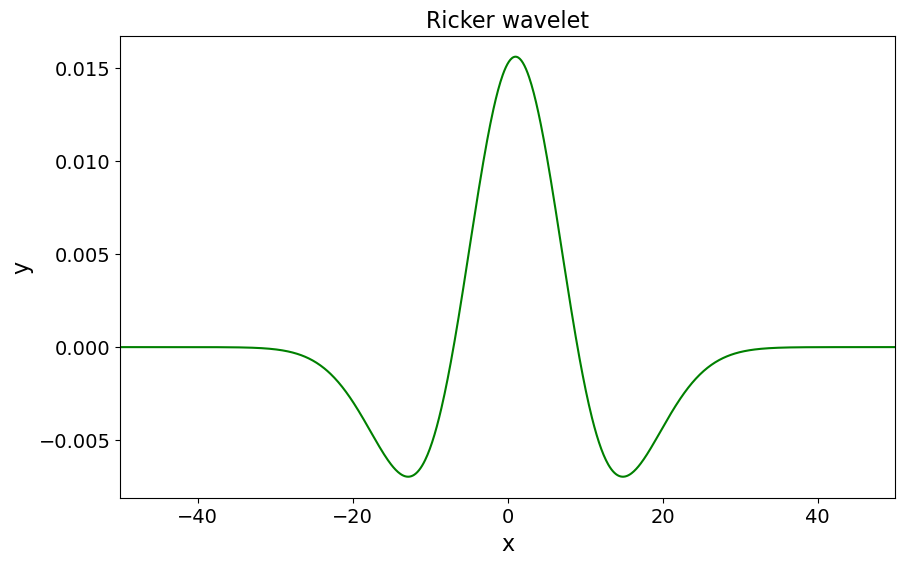

In [16]:
plt.figure(figsize=(10,6))
plt.title('Ricker wavelet',fontsize=16)
plt.plot(x,f_ricker,'g-')
plt.xlim(np.min(x),np.max(x))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()